# AR(p) model fitting

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

AR function from previous lab

In [3]:
def ar_function(p, n, phi, c, burnin=0):
    yt = np.zeros(n)
    eps = np.random.normal(0, 1, n + p)
    yt[:p] = eps[:p]
    for i in range(p, n):
         yt[i] = c + np.dot(phi, yt[i-p:i][::-1]) + eps[i]
    return yt[burnin:]

In [5]:
phi1 = 1.3
phi2 = -0.7
c = 8
n = 5000
yt_ar2 = ar_function(2, n, [phi1, phi2], c)

Plot the time series

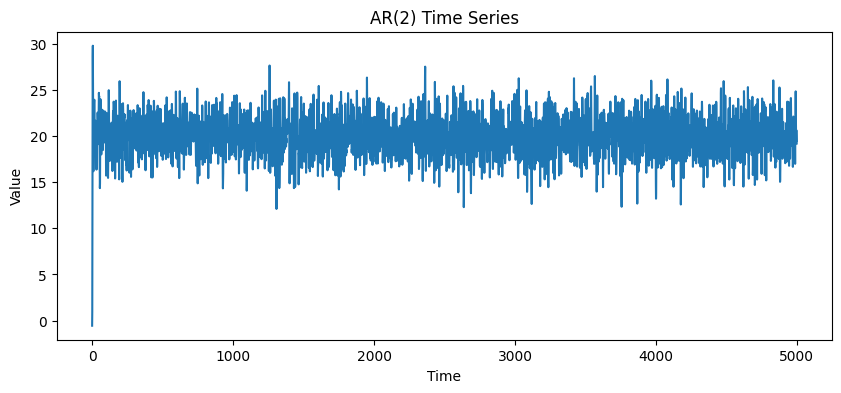

In [23]:
plt.figure(figsize=(10, 4))
plt.plot(yt_ar2)
plt.title('AR(2) Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

Calculating AIC for AR(1) and AR(2)

In [17]:
AR1 = sm.tsa.ARIMA(yt_ar2, order=(1, 0, 0)).fit()
AR2 = sm.tsa.ARIMA(yt_ar2, order=(2, 0, 0)).fit()
AR3 = sm.tsa.ARIMA(yt_ar2, order=(3, 0, 0)).fit()
AR4 = sm.tsa.ARIMA(yt_ar2, order=(4, 0, 0)).fit()
print(f"AIC for AR1: {AR1.aic}")
print(f"AIC for AR2: {AR2.aic}")
print(f"AIC for AR3: {AR3.aic}")
print(f"AIC for AR4: {AR4.aic}")

AIC for AR1: 17768.760995512814
AIC for AR2: 14361.184263844954
AIC for AR3: 14363.161417938132
AIC for AR4: 14364.64013744826


In [20]:
from scipy.stats import chi2

def determine_p_value(model1, model2):
    llrt = 2 * (model2.llf - model1.llf)
    df = model2.df_model - model1.df_model
    p_value = 1.0 - chi2.cdf(llrt, df)
    print(f"\nP-value for LLRT: {p_value}")
    if p_value < 0.05:
        print("Reject the null hypothesis that the reduced model fits better.")
    else:
        print("Fail to reject the null hypothesis.")

Comparing models

In [22]:
print("AR(1) and AR(2) comparison")
determine_p_value(AR1, AR2)
print("\nAR(2) and AR(3) comparison")
determine_p_value(AR2, AR3)
print("\nAR(3) and AR(4) comparison")
determine_p_value(AR3, AR4)

AR(1) and AR(2) comparison

P-value for LLRT: 0.0
Reject the null hypothesis that the reduced model fits better.

AR(2) and AR(3) comparison

P-value for LLRT: 0.8798584759242492
Fail to reject the null hypothesis.

AR(3) and AR(4) comparison

P-value for LLRT: 0.4702959720418909
Fail to reject the null hypothesis.


*The above outcome suggests that AR(2) model is the best model*

# MA(q) model fitting

In [25]:
def generate_MA(q, n, theta, c, burnin=0):
    yt = np.zeros(n)
    eps = np.random.normal(0, 1, n + q)
    yt[:q] = eps[:q]  # Initialize with random noise
    for i in range(q, n):
         yt[i] = c + np.dot(theta, eps[i-q:i][::-1]) + eps[i]
    return yt[burnin:]

In [26]:
theta_ma2 = [1, 0.8]
n = 5000
c = np.random.normal(0, 1)
yt_ma2 = generate_MA(2, n, theta_ma2, c)

Plot the time series

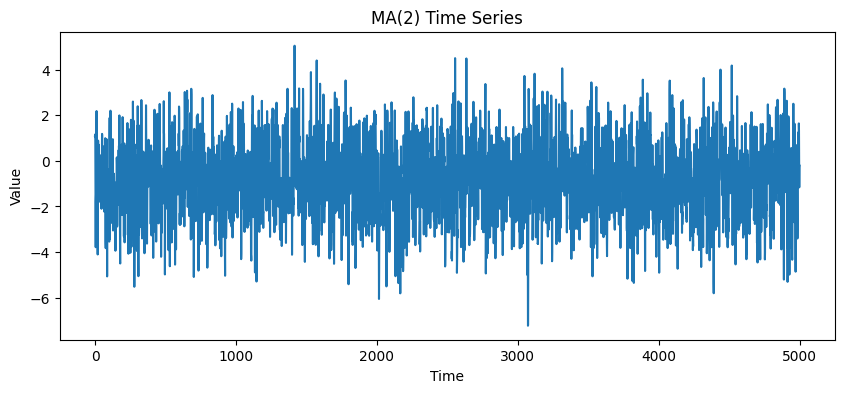

In [27]:
plt.figure(figsize=(10, 4))
plt.plot(yt_ma2)
plt.title('MA(2) Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

Calculating AIC for AR(1) and AR(2)

In [28]:
MA1 = sm.tsa.ARIMA(yt_ma2, order=(0, 0, 1)).fit()
MA2 = sm.tsa.ARIMA(yt_ma2, order=(0, 0, 2)).fit()
MA3 = sm.tsa.ARIMA(yt_ma2, order=(0, 0, 3)).fit()
MA4 = sm.tsa.ARIMA(yt_ma2, order=(0, 0, 4)).fit()
print(f"AIC for MA1: {MA1.aic}")
print(f"AIC for MA2: {MA2.aic}")
print(f"AIC for MA3: {MA3.aic}")
print(f"AIC for MA4: {MA4.aic}")

AIC for MA1: 16664.815261973417
AIC for MA2: 14183.872858824278
AIC for MA3: 14184.820672400569
AIC for MA4: 14186.791761655744


Comparing models using previously defined function

In [31]:
print("MA(1) and MA(2) comparison")
determine_p_value(MA1, MA2)
print("\nMA(2) and MA(3) comparison")
determine_p_value(MA2, MA3)
print("\nMA(3) and MA(4) comparison")
determine_p_value(MA3, MA4)

MA(1) and MA(2) comparison

P-value for LLRT: 0.0
Reject the null hypothesis that the reduced model fits better.

MA(2) and MA(3) comparison

P-value for LLRT: 0.30500407073453417
Fail to reject the null hypothesis.

MA(3) and MA(4) comparison

P-value for LLRT: 0.8649852856779126
Fail to reject the null hypothesis.
